V1
[0.21523477 0.12558953 0.10455549 0.07468257 0.07054928 0.06963974
 0.06710945 0.05813577 0.05273912 0.04610977 0.03892184 0.02604555
 0.02509215 0.01414046 0.01145448]
V2
print x and y
[[ 1.11982472 -1.23335117  1.97575158 ...  0.29168785  0.35633992
  -0.20312694]
 [-0.8929969  -0.41559058  0.01979497 ...  0.7246142   1.60828949
  -0.24495595]
 [ 1.11982472 -0.1819447  -0.95818334 ... -0.10926099 -0.06097661
  -0.49592996]
 ...
 [ 1.11982472  0.05170118 -0.95818334 ...  0.04570696 -0.81214636
   0.17333408]
 [ 1.11982472  0.16852412  0.99777327 ... -1.49413337 -0.89560966
  -0.57958797]
 [-0.8929969   0.28534706  0.01979497 ... -1.06120701  0.35633992
   1.05174313]]
0       0
1       0
2       0
3       1
4       0
       ..
3651    0
3652    1
3653    1
3654    0
3655    0
Name: TenYearCHD, Length: 3656, dtype: int64
>1 0.849 (0.004)
>2 0.848 (0.005)
>3 0.850 (0.006)
>4 0.850 (0.006)
>5 0.850 (0.007)
>6 0.849 (0.008)
>7 0.848 (0.006)
>8 0.848 (0.007)
>9 0.852 (0.007)
>10 0.853 (

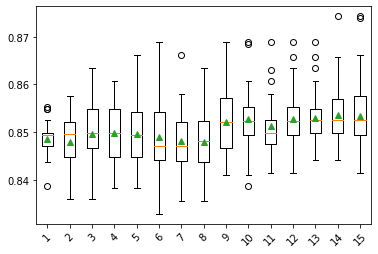

In [8]:
# Import needed packages
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd


# load the dataset - NEEDS FIXED TO BE WITH ACTUAL CLEANED DATA
data = pd.read_csv(r"C:\Users\Elianna\Documents\2020 Summer\ML\Project/datasets_222487_478477_framingham-cleanonly.csv")
# Remove label from X and define labels as y
X = data.iloc[:, 0:15]
y = data[data.columns[15]]

# Standardize the data
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler()
X = sc.fit_transform(X)

# VERSION 1 - Implementing and reporting explained variance ratio for each principle component
print("V1")
pca = PCA()
X_PCA = pca.fit_transform(X)
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

# VERSION 2 - Implement PCA for all possible number of components, and report accuracy, variance, and make box and whisker plot for each
# Following this tutorial structure : https://machinelearningmastery.com/principal-components-analysis-for-dimensionality-reduction-in-python/
print("V2")

# get a list of models to evaluate
def get_models():
	models = dict()
	for i in range(1,16):
		steps = [('pca', PCA(n_components=i)), ('m', LogisticRegression())]
		models[str(i)] = Pipeline(steps=steps)
	return models

# evaluate a given model using cross-validation - IS THIS A GOOD TEST FOR US? 
def evaluate_model(model):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores

# define dataset
print("print x and y")
print(X)
print(y)
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.xticks(rotation=45)
pyplot.show()